In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_test = pd.read_csv('Data/X_test.csv')
X_train = pd.read_csv('Data/X_train.csv')
y_train = pd.read_csv('Data/y_train.csv')

## Check data

#### First glance

In [3]:
X_train.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [4]:
y_train.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


#### Check nan

In [5]:
print (X_train.isnull().values.any())
print (y_train.isnull().values.any())

False
False


#### Check number of classes and its distribution

In [6]:
y_train.surface.unique()

array(['fine_concrete', 'concrete', 'soft_tiles', 'tiled', 'soft_pvc',
       'hard_tiles_large_space', 'carpet', 'hard_tiles', 'wood'],
      dtype=object)

In [7]:
y_train.surface.value_counts().reset_index().rename(columns={'index': 'target'})

,target,surface
0,concrete,779
1,soft_pvc,732
2,wood,607
3,tiled,514
4,fine_concrete,363
5,hard_tiles_large_space,308
6,soft_tiles,297
7,carpet,189
8,hard_tiles,21


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

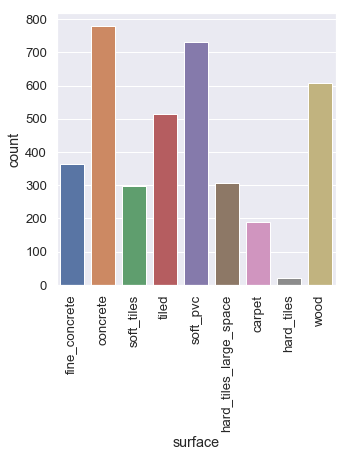

In [10]:
sns.set(style="whitegrid")
sns.set(font_scale=1.2)  
plt.figure(figsize=(5,5))
ax = sns.countplot(x="surface", data=y_train)
plt.xticks(rotation=90)

#### Check data distribution 

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


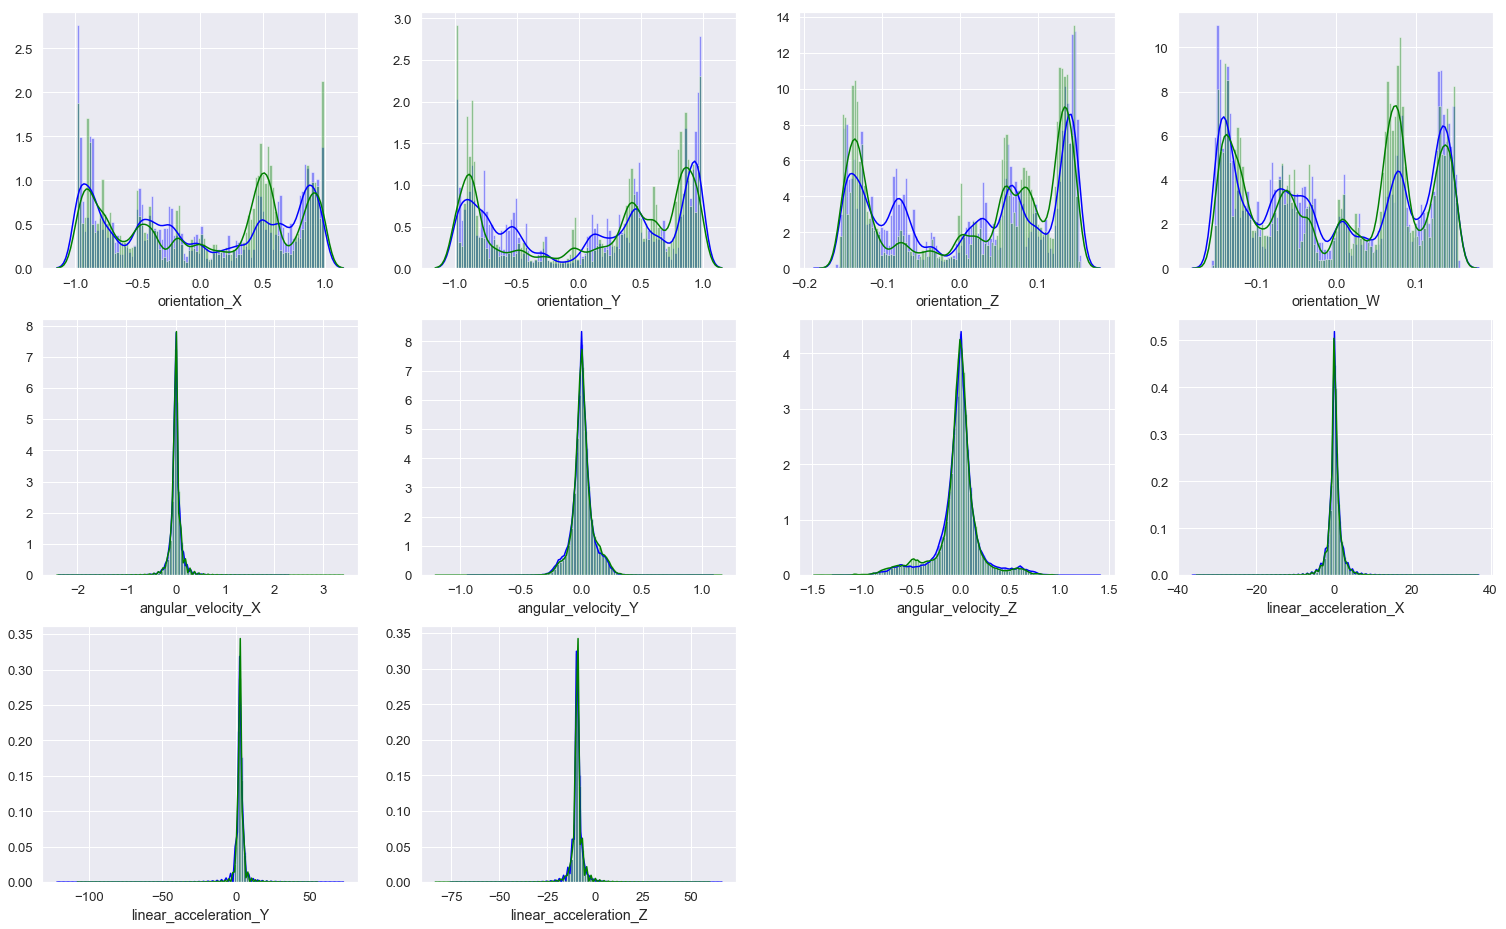

In [12]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(X_train.columns[3:]):
    plt.subplot(3, 4, i + 1)
    sns.distplot(X_train[col], color='blue', bins=100)
    sns.distplot(X_test[col], color='green', bins=100)

162    concrete
Name: surface, dtype: object


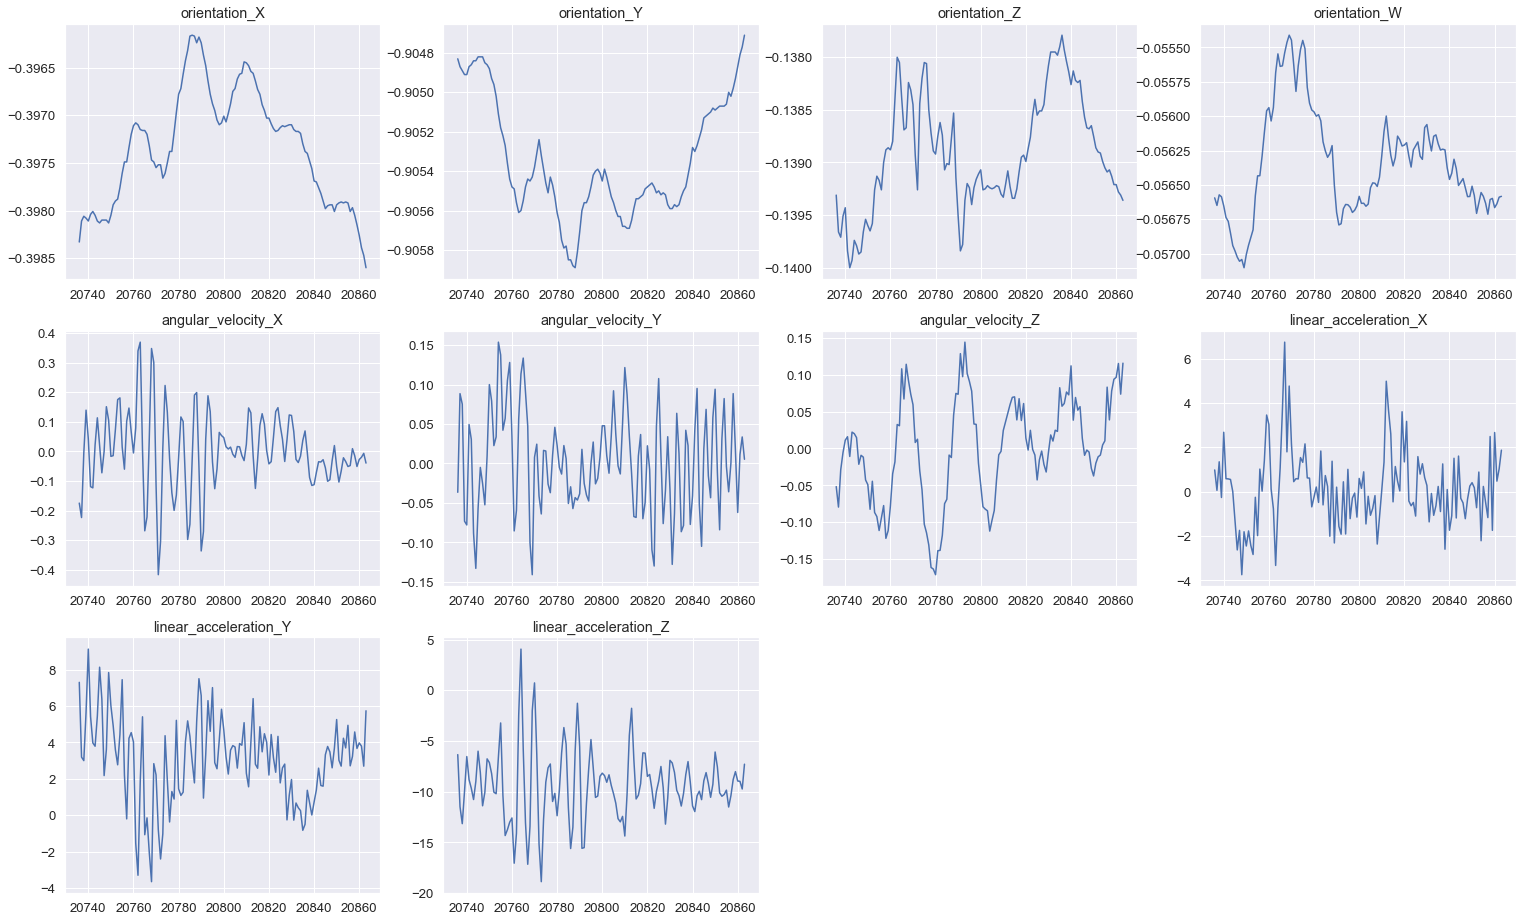

In [13]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(X_train.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.plot(X_train.loc[X_train['series_id'] == 162, col])
    plt.title(col)
print(y_train[y_train['series_id'] == 162].surface)

#### Investigate the label dataset

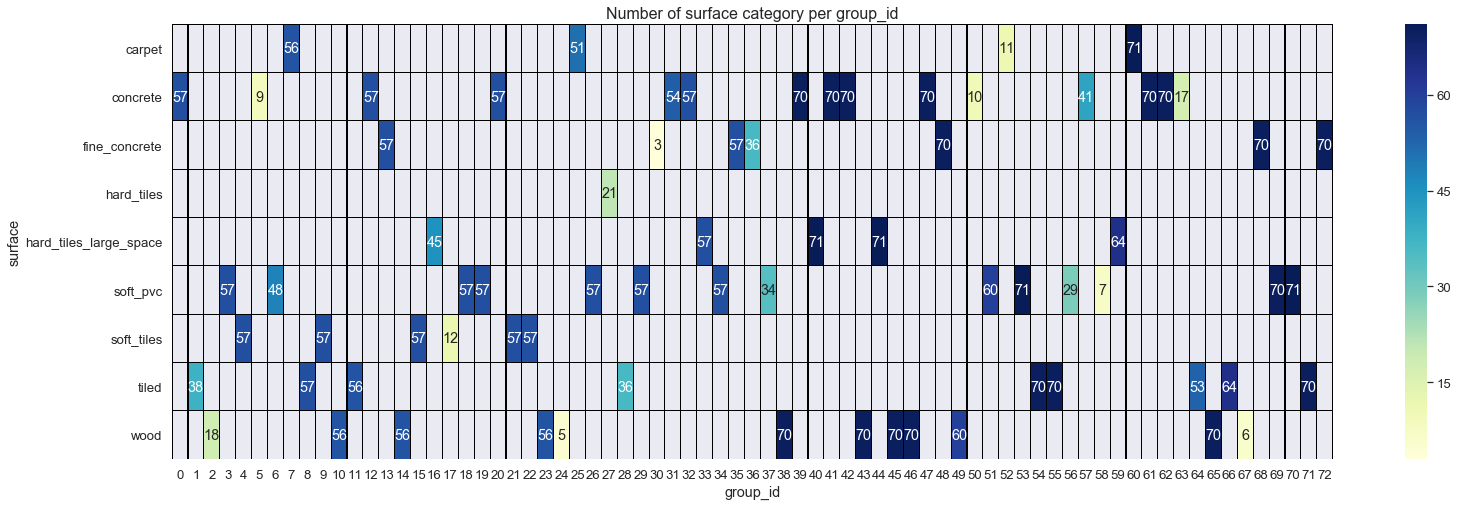

In [11]:
fig, ax = plt.subplots(1,1,figsize=(26,8))
tmp = pd.DataFrame(y_train.groupby(['group_id', 'surface'])['series_id'].count().reset_index())
m = tmp.pivot(index='surface', columns='group_id', values='series_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of surface category per group_id', size=16)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]), <a list of 73 Text xticklabel objects>)

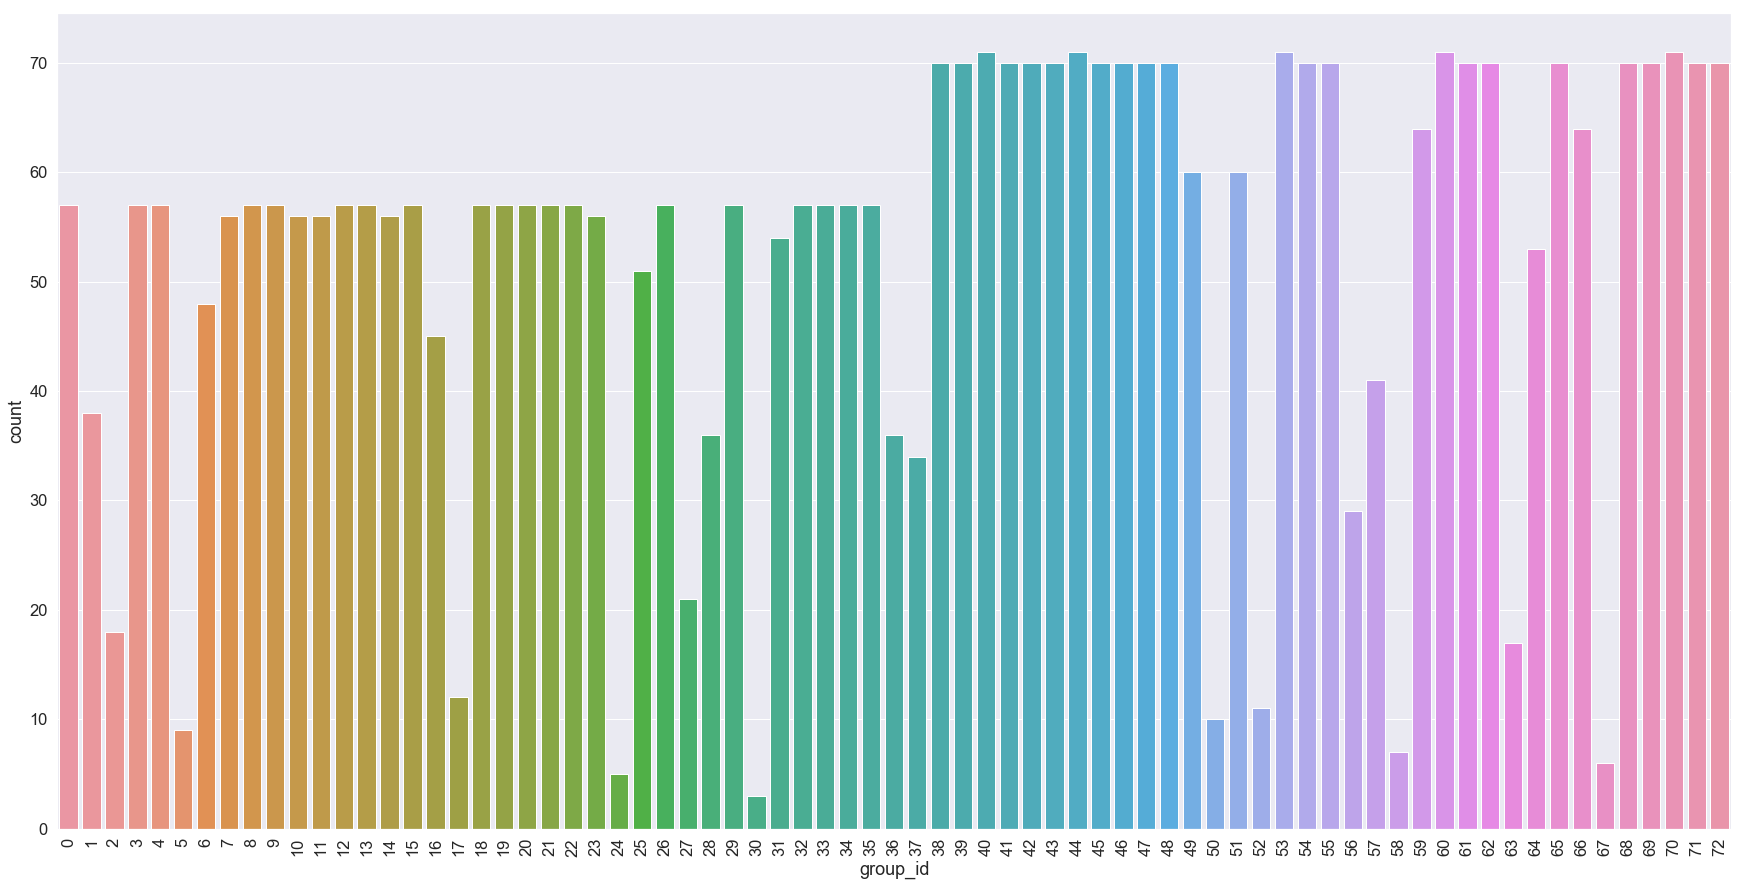

In [15]:
sns.set(style="whitegrid")
sns.set(font_scale=1.5) 
plt.figure(figsize=(30,15))
ax = sns.countplot(x="group_id", data=y_train)
plt.xticks(rotation=90)